# CIND820 Big Data Analytics Project

## Aaron Hosein

The following dataset was retrieved from Kaggle under a public domain license.\
The dataset contains information on new vehicles released during 2024.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
vehicle_df = pd.read_csv('vehicles_dataset.csv')

# Display the first few rows
vehicle_df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [2]:
# Show basic info about the dataset
print("Dataset Info:")
vehicle_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      100

In [3]:
# Show columns with any missing values
print("\nMissing Values (per column):")
print(vehicle_df.isnull().sum())


Missing Values (per column):
name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


In [4]:
# Show rows with any missing values
missing_data = vehicle_df[vehicle_df.isnull().any(axis=1)]
print(f"\nRows with missing values: {len(missing_data)}")
missing_data.head()


Rows with missing values: 252


,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
8,2024 Hyundai Tucson Hybrid Limited,NaN,Hyundai,Tucson Hybrid,New,2024,42230.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,5.0,6-Speed Automatic,Limited,SUV,4.0,White Pearl,Black,All-wheel Drive
14,2024 Chevrolet Blazer EV 2LT,\n \n Sterling Gray Metallic 2024 ...,Chevrolet,Blazer EV,New,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
23,2024 GMC Terrain Denali,NaN,GMC,Terrain,New,2024,44120.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Ebony,Jet Blk,All-wheel Drive
27,2024 Chrysler Pacifica Touring-L,\n \n $750 off MSRP! 2024 Chrysler...,Chrysler,Pacifica,New,2024,48705.0,24V MPFI DOHC,6.0,Gasoline,NaN,9-Speed Automatic,Touring-L,Passenger Van,4.0,Diamond Black,Black,All-wheel Drive


In [5]:
# Fill missing 'description' with a placeholder string
vehicle_df['description'] = vehicle_df['description'].fillna('No description provided')

# Drop rows with missing 'price' values — usually critical for analysis
vehicle_df = vehicle_df.dropna(subset=['price'])

# Fill missing 'engine' with 'Unknown'
#df['engine'] = df['engine'].fillna('Unknown')
vehicle_df = vehicle_df.dropna(subset=['engine'])

# Fill 'cylinders' with median (numeric and often varies by model)
vehicle_df['cylinders'] = vehicle_df['cylinders'].fillna(vehicle_df['cylinders'].median())

# Fill 'fuel' with mode (most common fuel type)
vehicle_df['fuel'] = vehicle_df['fuel'].fillna(vehicle_df['fuel'].mode()[0])

# Fill 'mileage' with median — often skewed, so median is better than mean
vehicle_df['mileage'] = vehicle_df['mileage'].fillna(vehicle_df['mileage'].median())

# Fill 'transmission' with mode (most common transmission type)
vehicle_df['transmission'] = vehicle_df['transmission'].fillna(vehicle_df['transmission'].mode()[0])

# Fill 'trim' with 'Unknown'
vehicle_df['trim'] = vehicle_df['trim'].fillna('Unknown')

# Fill 'body' with mode
vehicle_df['body'] = vehicle_df['body'].fillna(vehicle_df['body'].mode()[0])

# Fill 'doors' with mode — generally 2 or 4
vehicle_df['doors'] = vehicle_df['doors'].fillna(vehicle_df['doors'].mode()[0])

# Fill 'exterior_color' and 'interior_color' with 'Unknown'
vehicle_df['exterior_color'] = vehicle_df['exterior_color'].fillna('Unknown')
vehicle_df['interior_color'] = vehicle_df['interior_color'].fillna('Unknown')

In [6]:
# Show columns with any missing values
print("\nMissing Values (per column):")
print(vehicle_df.isnull().sum())


Missing Values (per column):
name              0
description       0
make              0
model             0
type              0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


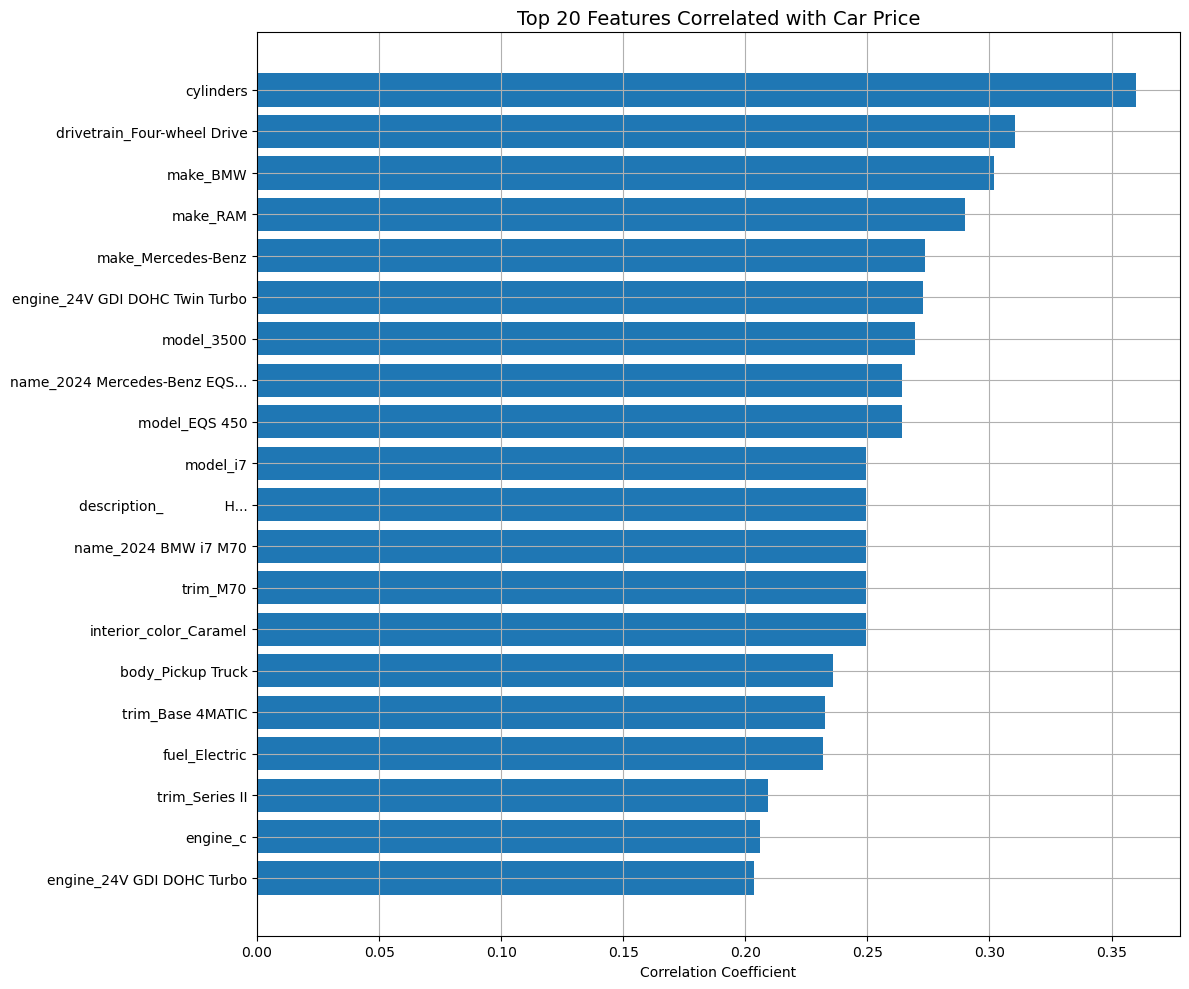

In [7]:
# Set top x parameter
top_x = 20

# One-hot encode categorical columns
vehicle_encoded_df = pd.get_dummies(vehicle_df, drop_first=True)

# Compute correlation with 'price'
correlation_with_price = vehicle_encoded_df.corr()['price'].drop('price').sort_values(ascending=False)

# Clean column names (remove problematic characters)
correlation_with_price.index = correlation_with_price.index.str.replace(r'[\r\n]+', '', regex=True)

# Truncate feature names for display
truncated_labels = correlation_with_price.head(top_x).sort_values().index.to_series().apply(
    lambda x: x if len(x) <= 30 else x[:27] + "..."
)

# Plot horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(truncated_labels, correlation_with_price.head(top_x).sort_values())
plt.title("Top 20 Features Correlated with Car Price", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

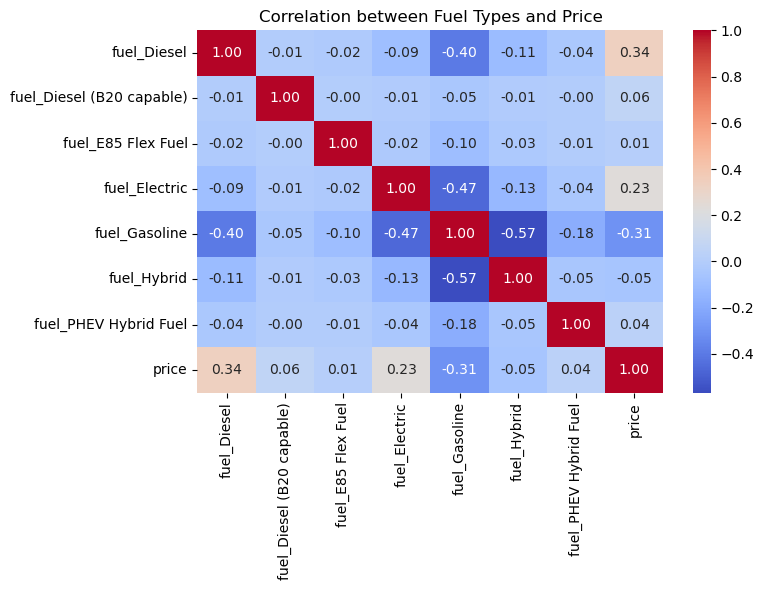

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode the fuel column
fuel_dummies = pd.get_dummies(vehicle_df['fuel'], prefix='fuel')

# Concatenate one-hot encoded columns to the original dataframe
df_encoded = pd.concat([vehicle_df, fuel_dummies], axis=1)

# Add only the one-hot encoded fuel columns and price for correlation
correlation_data = df_encoded[fuel_dummies.columns.tolist() + ['price']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Fuel Types and Price")
plt.tight_layout()
plt.show()


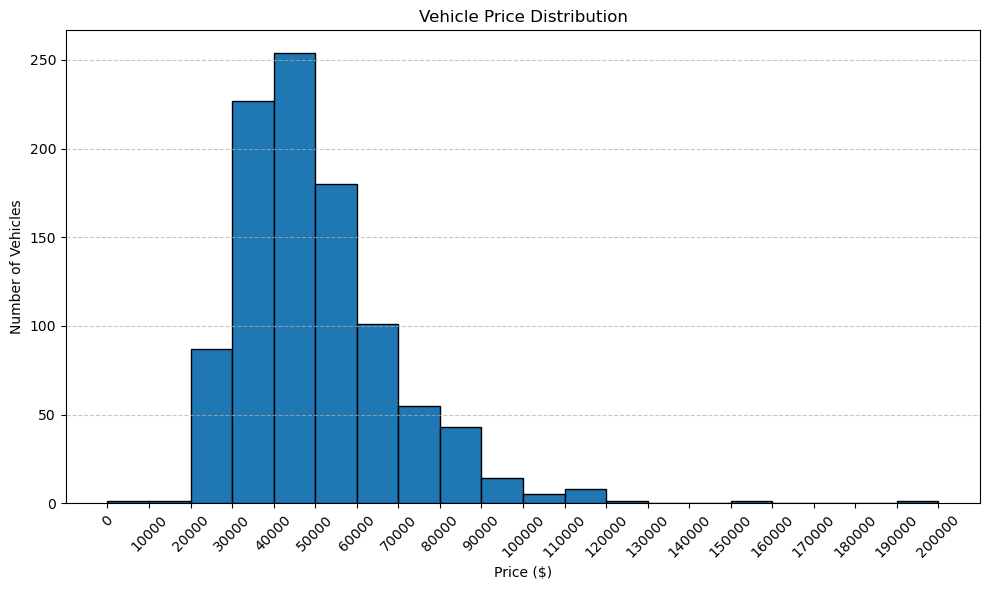

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vehicles_dataset.csv')

# Drop missing values in price
price_data = df['price'].dropna()

# Define bin width and bins
bin_width = 10000
max_price = price_data.max()
bins = range(0, int(max_price + bin_width), bin_width)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=bins, edgecolor='black')
plt.title('Vehicle Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Vehicles')
plt.xticks(bins, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

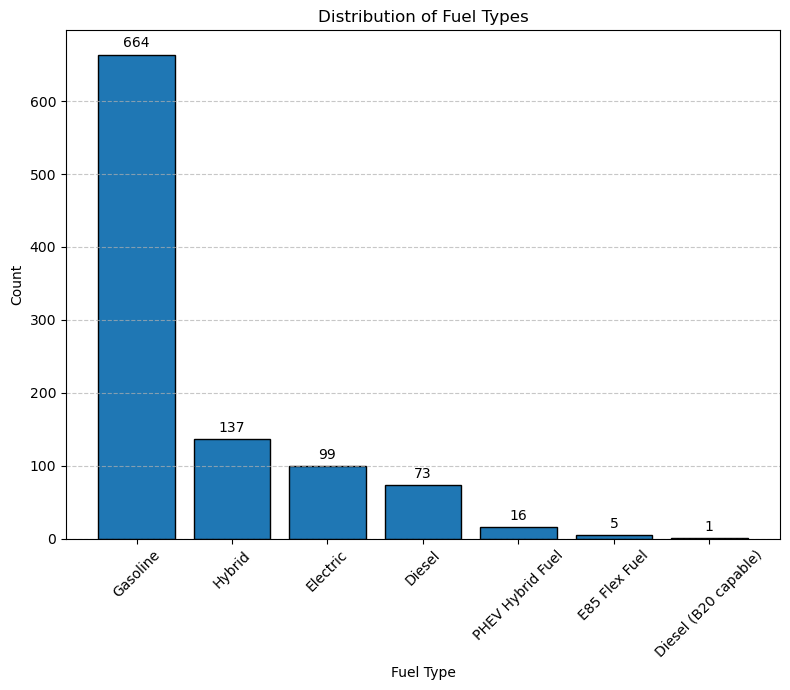

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("vehicles_dataset.csv")

# Count occurrences of each fuel type
fuel_counts = df['fuel'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(fuel_counts.index, fuel_counts.values, edgecolor='black')

# Add data callouts above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Final plot formatting
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

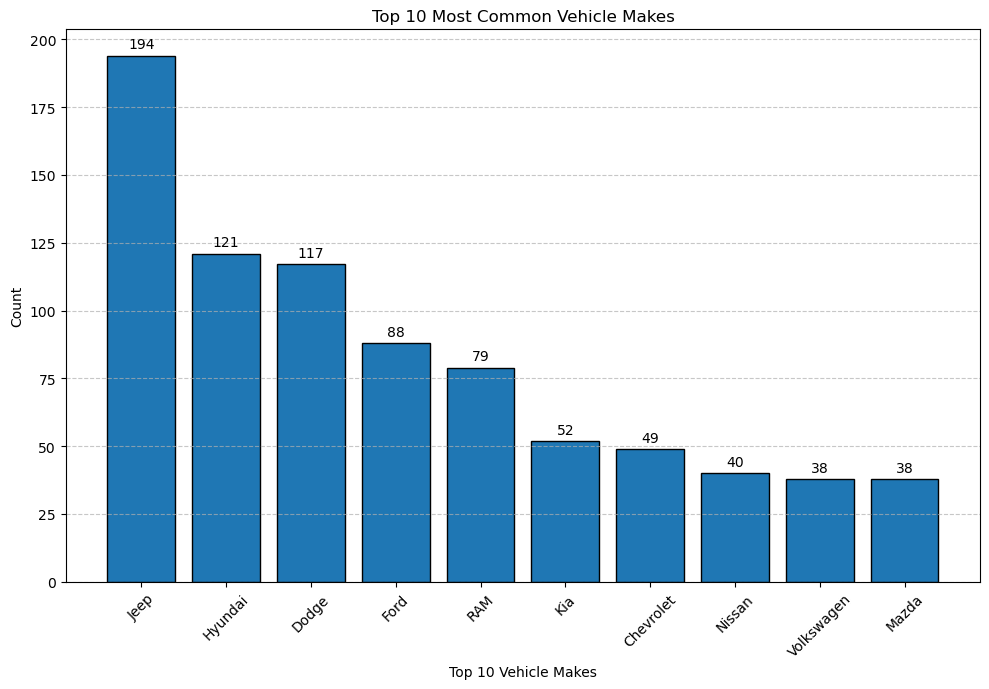

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("vehicles_dataset.csv")

# Get the top 10 most common vehicle makes
top_makes = df['make'].value_counts().nlargest(10)

# Create bar plot
plt.figure(figsize=(10, 7))
bars = plt.bar(top_makes.index, top_makes.values, edgecolor='black')

# Add data callouts above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

# Final plot formatting
plt.xlabel('Top 10 Vehicle Makes')
plt.ylabel('Count')
plt.title('Top 10 Most Common Vehicle Makes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


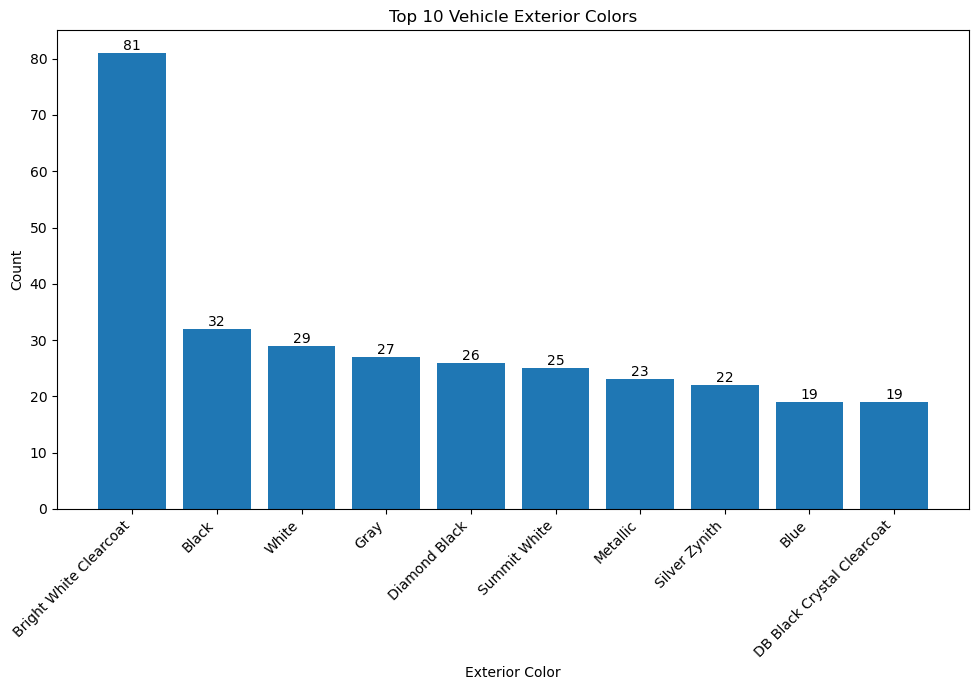

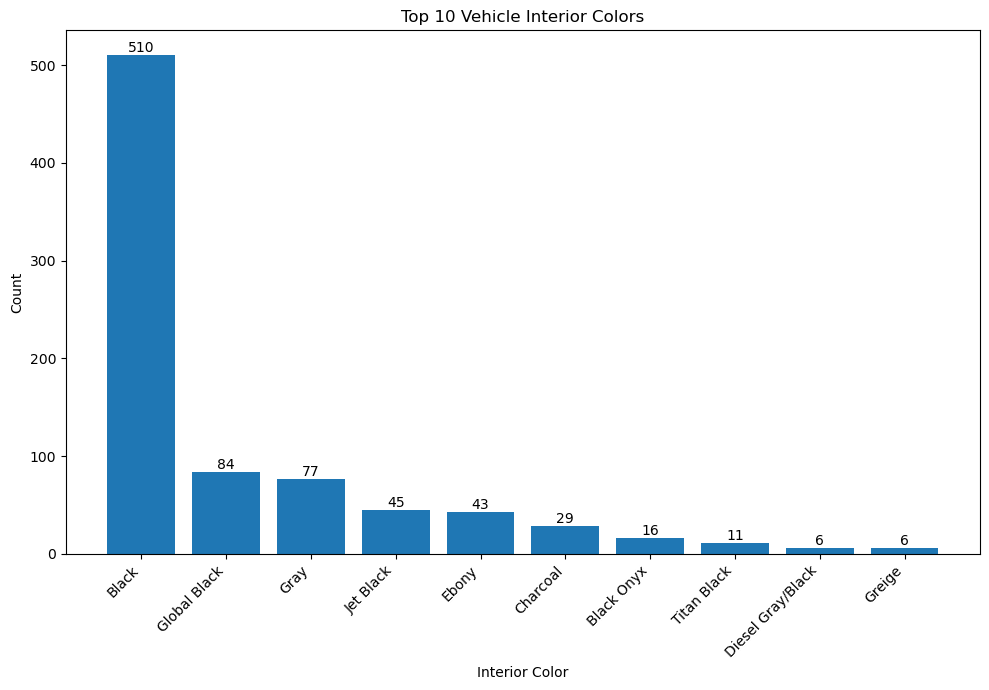

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("vehicles_dataset.csv")

# Count of vehicles by exterior and interior colors
exterior_counts = df['exterior_color'].value_counts().head(10)
interior_counts = df['interior_color'].value_counts().head(10)

# Plot for top 10 exterior colors
plt.figure(figsize=(10, 7))
bars = plt.bar(exterior_counts.index, exterior_counts.values)
plt.title('Top 10 Vehicle Exterior Colors')
plt.xlabel('Exterior Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Plot for top 10 interior colors
plt.figure(figsize=(10, 7))
bars = plt.bar(interior_counts.index, interior_counts.values)
plt.title('Top 10 Vehicle Interior Colors')
plt.xlabel('Interior Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()